In [6]:
import pickle
import pandas as pd
import numpy as np 
import os
import spacy
import re

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='gensim')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

#import salt.models.ldaTools as tools

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [2]:
cv=open('cv_pickle', 'rb')
cv=pickle.load(cv)

EOFError: Ran out of input

In [6]:
cv=pd.read_csv('cv_csv')
cv.head()

Unnamed: 0  pass  num_topics  coherence_score
0           0     0           2        -2.142849
1           1     0           3        -2.173319
2           2     0           4        -2.181117
3           3     0           5        -2.242970
4           4     0           6        -2.243179

In [7]:
ax=sns.lineplot(x='num_topics', y='coherence_score', data=cv)

In [4]:
corpus=open('2500Corpus_pickle', 'rb')
corpus=pickle.load(corpus)
id2word=open('2500Dictionary_pickle', 'rb')
id2word=pickle.load(id2word)

In [5]:
lda = LdaMulticore(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = 4,
               passes=10,
               workers=6
              )

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator))

In [13]:
with open('testComments', 'rb') as rf:
    comments=pickle.load(rf)


In [22]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.086131 -0.061669       1        1  39.173515
1      0.020169 -0.053821       2        1  22.775408
3     -0.064215  0.099079       3        1  19.783264
0      0.130176  0.016410       4        1  18.267817, topic_info=     Category         Freq         Term        Total  loglift  logprob
554   Default  2794.000000         code  2794.000000  30.0000  30.0000
1469  Default  1367.000000     language  1367.000000  29.0000  29.0000
265   Default  5382.000000          use  5382.000000  28.0000  28.0000
1171  Default  1853.000000          app  1853.000000  27.0000  27.0000
620   Default  1039.000000  programming  1039.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
172    Topic4   544.228455          way  4413.536133  -0.3930  -5.9855
51     Topic4   557.530762         time  5817.053223  -0.6450  -5.9613
977    Topic4   515.362488          ive  3031.644775  -0.0720  -6.0400
838    Topic4   505.715332         want  3716.395020  -0.2945  -6.0589
48     Topic4   494.935822        thats  3250.755371  -0.1822  -6.0804

[417 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
181       1  0.352130         1
181       2  0.221018         1
181       3  0.147220         1
181       4  0.279456         1
381       1  0.429159  actually
...     ...       ...       ...
203       4  0.004208     young
276       1  0.552088     youre
276       2  0.102277     youre
276       3  0.225079     youre
276       4  0.120367     youre

[981 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [9]:
stops=[x for x in STOPWORDS]
stops= stops + ['', 'im']

def tokenize(data):
    ''' this function takes in a string, cleans it and returs it as a list of tokens
    it works as a .apply function on a dataframe'''
    comm=data.lower()
    comm=re.sub(r'[^a-zA-Z ^0-9]', '', comm)
    return [token for token in comm.split(' ') if token not in stops]

In [21]:
for comment in comments:
    tokens=tokenize(comment[0])
    scores=lda[id2word.doc2bow(tokens)]
    print(comment[0])
    print(f'Vader Negativity Score: {comment[1]}')
    print(f'LDA Topic Scores: {scores}')
    print()

I'm going to go ahead and play devil's advocate; I think concern over this is really overblown. There are two things about this case that I don't really get: 1. If you're blasting your data over an unencrypted wifi connection, do you have a reasonable expectation of privacy? This seems to be equivalent to someone screaming the contents of their email, and then getting angry at you for eavesdropping. Also, who the hell transfers that kind of data over anything but SSL? 2. What was Google trying to get out of these packets, besides wifi-GPS data? This seems like more of a simple overstep of collection than anything else. Do we seriously think that this data was collected maliciously? They already have the majority of people's data, what more would they be trying to get? After all of my DNS lookups, my GPS coordinates, my email, and my social connections, what more is there?
Vader Negativity Score: 0.061
LDA Topic Scores: [(0, 0.46970546), (1, 0.09101954), (2, 0.434569)]

Chrome is less p

In [128]:
def getLDAScores(text):
    tokens=tokenize(text)
    scores=lda[id2word.doc2bow(tokens)]
    print(text)
    print(f'The LDA Scores are: {scores}')
    print()

In [27]:
getLDAScores('that was terrible you should go die in a hole')

that was terrible you should go die in a hole
The LDA Scores are: [(0, 0.8049527), (1, 0.063399084), (2, 0.0660116), (3, 0.06563668)]


In [7]:
with open('negativeComments', 'rb') as comm:
    negatives=pickle.load(comm)

In [12]:
negComments=[]
for comment in negatives:
    tokens=tokenize(comment[0])
    scores=lda[id2word.doc2bow(tokens)]
#     print(comment[0])
#     print(f'Vader Negativity Score: {comment[1]}')
#     print(f'LDA Topic Scores: {scores}')
    scores=ldaToDense(scores)
    negComments.append({'comment': comment[0],'vader score': comment[1], 'LDA 0': scores[0][1], 'LDA 1': scores[1][1],'LDA 2': scores[2][1],'LDA 3': scores[3][1]})
len(negComments)

500

In [32]:
salt=["You should rethink your position, it's not based on fact and only your own subjective opition",
"Wow, that's an ugly baby",
"What makes you an expert? Did you learn that in your intro course to economics? The process is much more complicated. Go read a book!",
"It's not like he's the worst dancing partner, I just think he could be more coordinated"]

In [35]:
for s in salt:
    getLDAScores(s)

You should rethink your position, it's not based on fact and only your own subjective opition
The LDA Scores are: [(0, 0.04337093), (1, 0.04317679), (2, 0.04590933), (3, 0.867543)]

Wow, that's an ugly baby
The LDA Scores are: [(0, 0.20544934), (1, 0.05159839), (2, 0.68789834), (3, 0.055053927)]

What makes you an expert? Did you learn that in your intro course to economics? The process is much more complicated. Go read a book!
The LDA Scores are: [(0, 0.02345439), (1, 0.023977159), (2, 0.13538355), (3, 0.81718487)]

It's not like he's the worst dancing partner, I just think he could be more coordinated
The LDA Scores are: [(0, 0.031777572), (1, 0.032007396), (2, 0.9038581), (3, 0.03235689)]



In [39]:
len(negatives)
, 'LDA 0': scores[0][1], 'LDA 1': scores[1][1],'LDA 2': scores[2][1],'LDA 3': scores[3][1]

40

In [14]:
with open('positiveComments', 'rb') as f: 
    positive=pickle.load(f)

In [15]:
comments=[]
for comment in positive:
    tokens=tokenize(comment[0])
    scores=lda[id2word.doc2bow(tokens)]
#     print(comment[0])
#     print(f'Vader Positivity Score: {comment[1]}')
#     print(f'LDA Topic Scores: {scores}')
#     print()
    scores=ldaToDense(scores)
    comments.append({'comment': comment[0],'vader score': comment[1], 'LDA 0': scores[0][1], 'LDA 1': scores[1][1],'LDA 2': scores[2][1],'LDA 3': scores[3][1]})
len(comments)

500

In [11]:
def ldaToDense(scores):
    newScore=np.zeros((4))
    for score in scores:
        newScore[score[0]]=score[1]
    tuples=[]
    for i, x in enumerate(newScore):
        tuples.append((i, x))
    return tuples

In [78]:
ldaToDense([(1, 0.9029265), (2, 0.08473288)])

[(0, 0.0), (1, 0.9029265), (2, 0.08473288), (3, 0.0)]

In [16]:
posdf = pd.DataFrame(comments)
negdf = pd.DataFrame(negComments)

In [90]:
negdf['LDA 2'].plot(kind='hist')

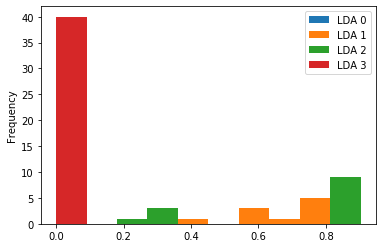

In [89]:
posdf.plot(kind='hist')

In [97]:
negdf.plot(kind='box')

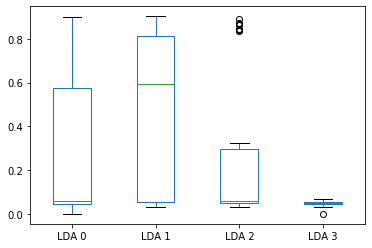

In [98]:
posdf.plot(kind='box')

In [17]:
neutral=pickle.load(open('neutralComments', 'rb'))
neucomments=[]
for comment in neutral:
    tokens=tokenize(comment[0])
    scores=lda[id2word.doc2bow(tokens)]
    scores=ldaToDense(scores)
    neucomments.append({'comment': comment[0],'vader score': comment[1], 'LDA 0': scores[0][1], 'LDA 1': scores[1][1],'LDA 2': scores[2][1],'LDA 3': scores[3][1]})
neudf=pd.DataFrame(neucomments)

In [18]:
compound=pickle.load(open('compoundComments', 'rb'))
compcomments=[]
for comment in compound:
    tokens=tokenize(comment[0])
    scores=lda[id2word.doc2bow(tokens)]
    scores=ldaToDense(scores)
    compcomments.append({'comment': comment[0],'vader score': comment[1], 'LDA 0': scores[0][1], 'LDA 1': scores[1][1],'LDA 2': scores[2][1],'LDA 3': scores[3][1]})
compdf=pd.DataFrame(compcomments)

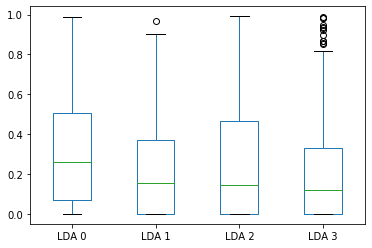

In [111]:
neudf.plot(kind='box')

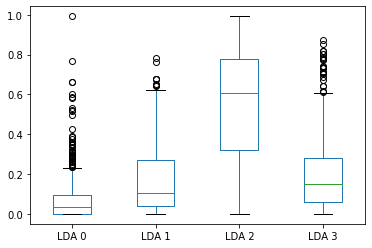

In [112]:
compdf.plot(kind='box')

In [145]:
compdf[compdf['LDA 2']>.7]['LDA 2'].sort_values()

86     0.704212
7      0.705109
229    0.706586
151    0.707708
304    0.710264
         ...   
467    0.975812
350    0.983352
340    0.988945
205    0.992375
222    0.992452
Name: LDA 2, Length: 195, dtype: float64

In [1]:
negdf[negdf['LDA 2']>.7]['LDA 2'].sort_values()

NameError: name 'negdf' is not defined

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows=50

In [122]:
negdf.shape

(40, 6)

In [146]:
import seaborn as sns

In [151]:
compdf.set_index('comment', inplace=True)

In [155]:
compdf['vader score']=pd.to_numeric(compdf['vader score'])

In [2]:
sns.pairplot(compdf)

NameError: name 'sns' is not defined

In [19]:
def prep_for_pairplot(df):
    df=df.set_index('comment')
    df['vader score']=pd.to_numeric(df['vader score'])
    return df

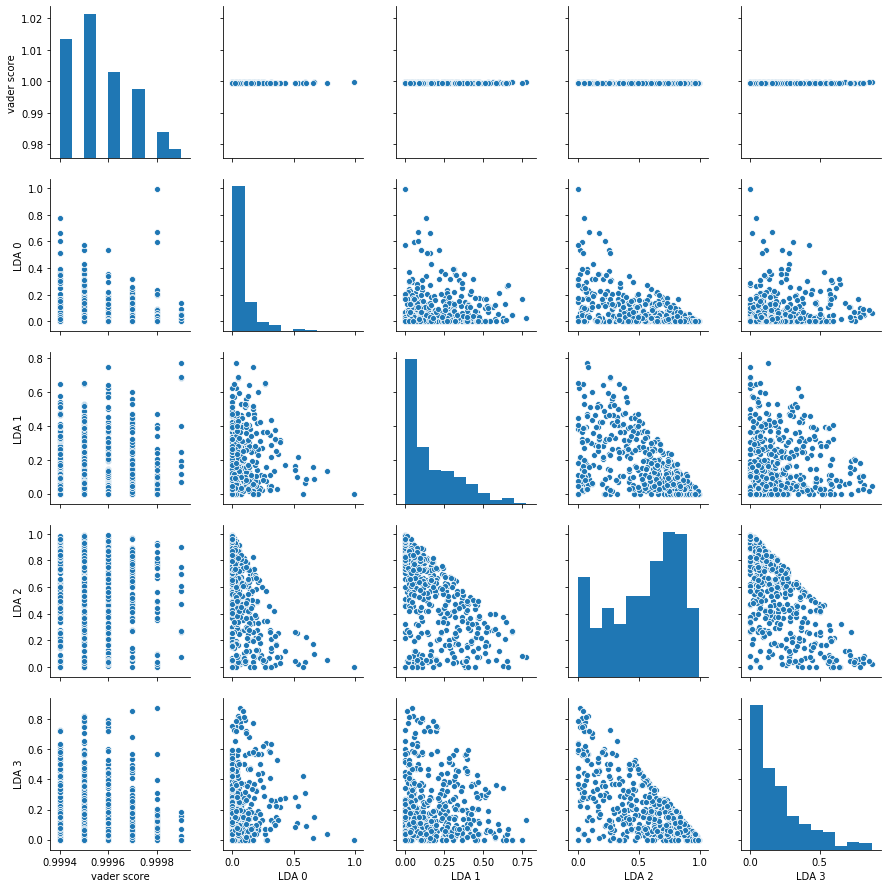

In [26]:
compdf=prep_for_pairplot(compdf)
sns.pairplot(compdf)

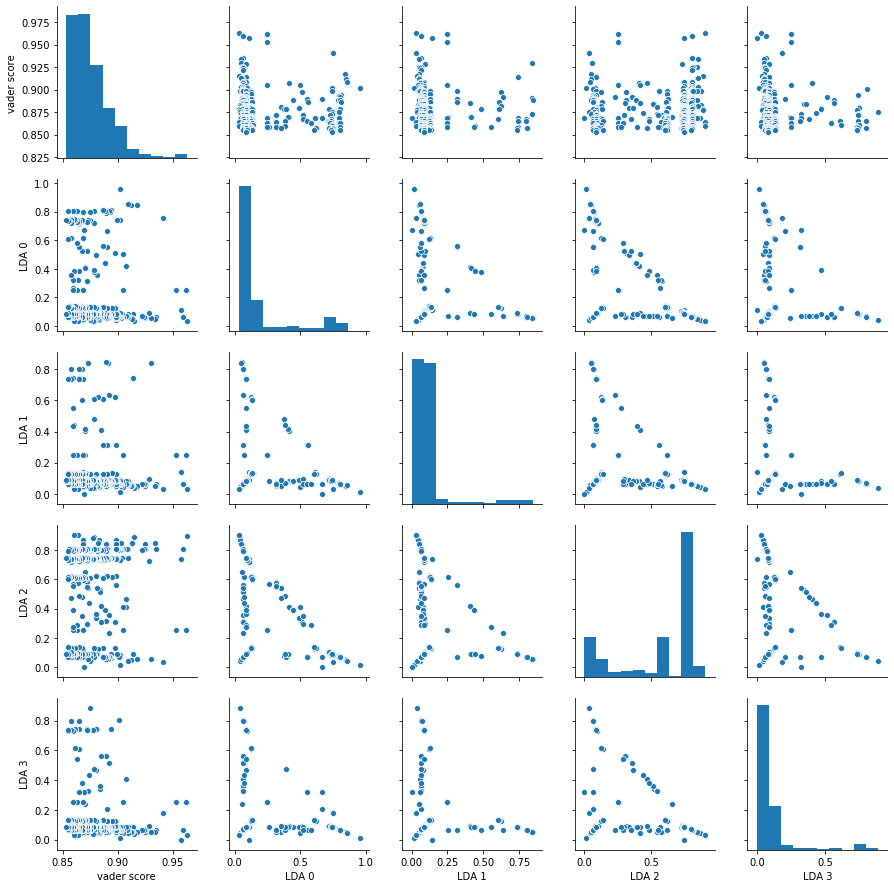

In [23]:
negdf=prep_for_pairplot(negdf)
sns.pairplot(negdf)

In [24]:
posdf=prep_for_pairplot(posdf)
sns.pairplot(posdf)

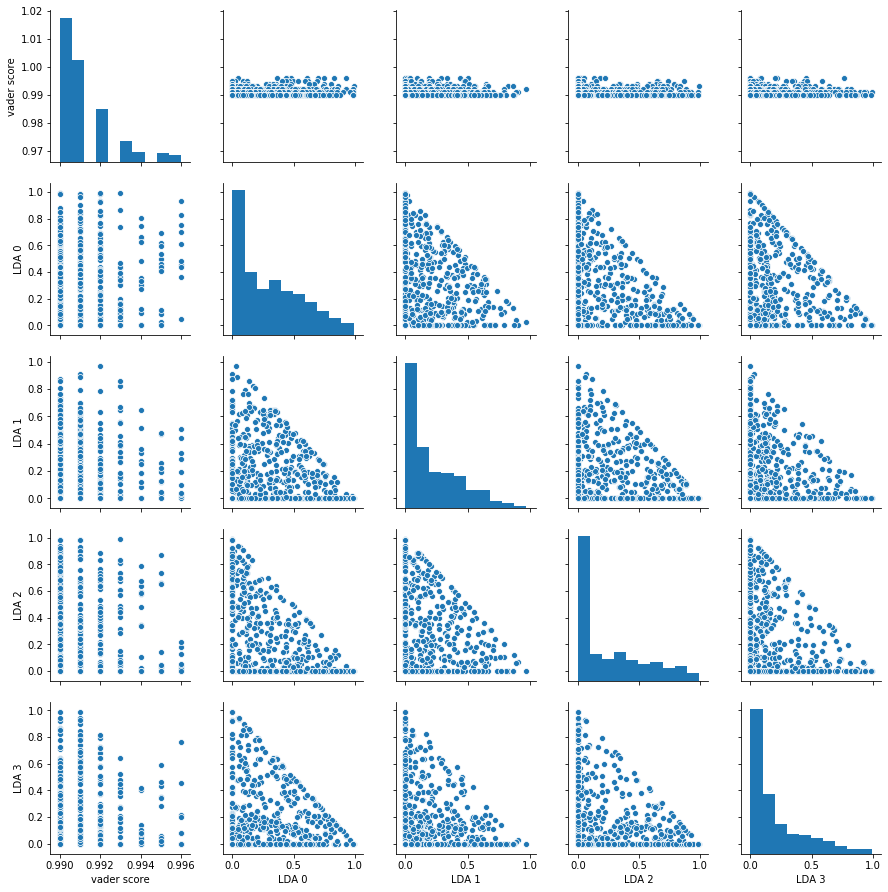

In [25]:
neudf=prep_for_pairplot(neudf)
sns.pairplot(neudf)

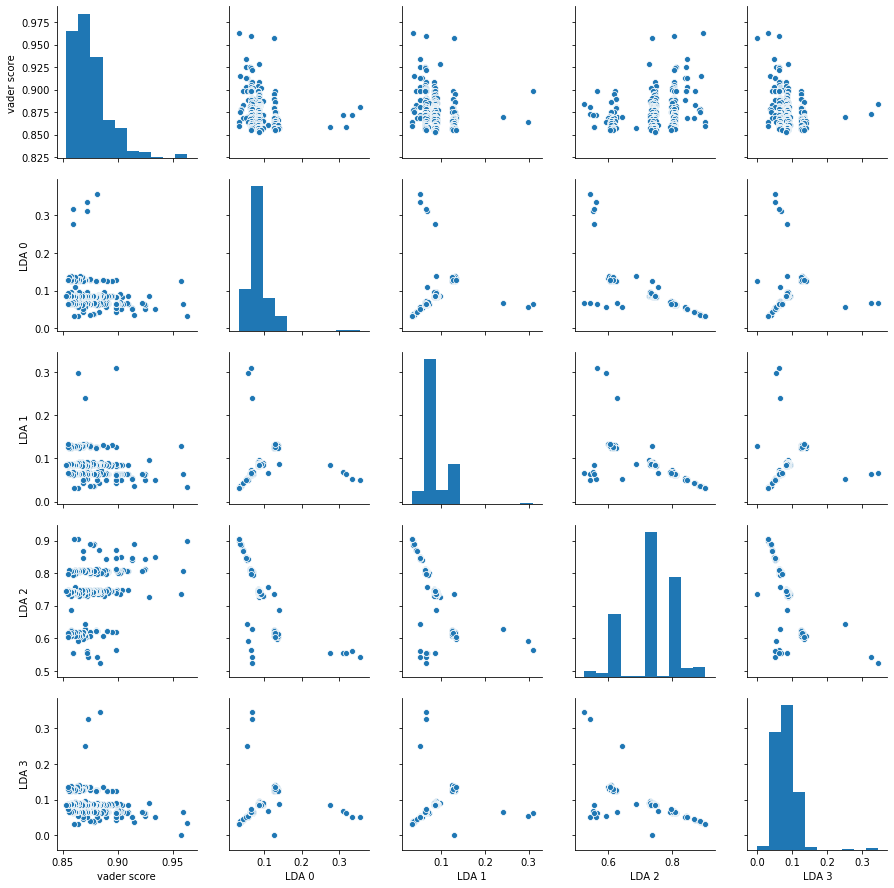

In [163]:
sns.pairplot(negdf[negdf['LDA 2']>.5])

In [105]:
negdf['VaderType']=['negative' for x in range(negdf.shape[0])]
posdf['VaderType']=['positive' for x in range(posdf.shape[0])]
neudf['VaderType']=['neutral']*neudf.shape[0]
compdf['VaderType']=['compound']*compdf.shape[0]
everything=pd.concat([negdf, posdf, compdf, neudf], axis=0)
everything=everything.reorder()

In [106]:
everything.sort_values(by='LDA 3', ascending=False).head(10)

comment  \
1744  Code and knowledge are two different things. Unless you're using highly well-established APIs (such as promises), then of course, you'll have to rewrite things to match the new expected syntax. Portability of knowledge is a different beast. For example, the vast majority of ng-repeat related concepts is completely non-portable (think `ng-repeat-start`, `track by`, `(x, y) in foo`, `$index`, etc). You learn that `ng-repeat="x in foo | filter: bar"` is equivalent to a for loop that displays only some items, but you can't really apply that knowledge anywhere outside of Angular. You can't reuse your basic knowledge of for loops and if statements coming into Angular, and you can't use your knowledge about the pipe syntax anywhere else when you leave Angular. In contrast, a framework that employs `.map` and `.filter` might teach you a bit about FP, and this is something you can use in Angular, Ember, React, and even vanilla js.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [98]:
everything.shape

(2000, 7)

In [107]:
shortComments=everything[everything['comment'].str.len()<500]

In [115]:

shortComments[shortComments['LDA 0']>.3].sort_values(by='LDA 2', ascending=False).head(100)

comment  \
799  Awesome, inspiring story. Congrats.                                                                          
244  Crash early, crash hard.                                                                                     
892  Afternoon laughter, thanks :D                                                                                
351  Stop being a cunt dang. Stop raping!                                                                         
412  Exporting poverty? Ludicrous!                                                                                
246  t. "dumb fuck"                                                                                               
138  Sad, sad irony. Screenshot:                                                                                  
711  Wow, great job. Thanks!                                                                                      
811  hahaha thanks! Much appreciated!                                                                             
346  Pay wall blocked :(                                                                                          
912  Pinged successful. Thanks! :)                                                                                
774  Ooh, cool, okay! Thanks! :)                                                                                  
586  LOL glad I could help. :)                                                                                    
461  poor robot :(                                                                                                
584  Lol, thanks for a good laugh.                                                                                
578  Thanks! I appreciate the positivity. :)                                                                      
771  Thanks! Best 'o luck!                                                                                        
27   dats victim blaming blah blah blah                                                                           
24   No terrorist attacks either.                                                                                 
705  lol, wow, that's pretty intense                                                                              
683  HAHAHA nice one :D                                                                                           
99   No harm, no foul.                                                                                            
95   No harm, no foul.                                                                                            
97   No harm, no foul.                                                                                            
94   No harm, no foul.                                                                                            
98   No harm - no foul.                                                                                           
93   No harm, no foul.                                                                                            
977  Super helpful, thanks dude!                                                                                  
703  Cool, thanks. I appreciate your honesty.                                                                     
608  Wow - ok, nice job :)                                                                                        
309  broken link , losers                                                                                         
932  Thanks man. Respect :D                                                                                       
143  Annoying as hell                                                                                             
55   No disaster recovery? :/                                                                                     
538  LOL.  I needed a laugh, thanks. :)                                        

In [56]:
pd.options.display.max_rows=100

In [47]:
shortComments.shape

(1616, 6)

In [48]:
len("The Buddhist comment on the blog was excellent. I think the truth is in the middle, and the comment already nailed that middle ground. You need to take action to better your life, but also be wise enough to appreciate what you have. I've done a lot of traveling, moved around many times around the country after 30. I'm a very unafraid and bold individual, as is my wife. I lived and worked in another country. I wouldn't say it wasn't worth it, and I'd do it all again even though it was a lot of work and sometimes stress. I learned a lot about the world around me, and myself. I don't think everyone needs to do these things. It depends on the person and critically, your motivation for doing so. I never did anything I've done out of curing unhappiness. The thought never even crossed my mind once in my life, until reading that blog. If that's the motivation, I think disappointment awaits. Mine were all related to goals, helping my spouse achieve her dreams, or achieving my own. Which increased happiness, but the goals weren't set out of unhappiness. I was happy, we were happy, but we wanted to do something more with our time on Earth, and take some risks. It was fun, we'll probably do it more if it makes sense. We keep pushing, I'm a very satisfied developer with no more career goals to check off my list, she just received her Masters and soon onto her PHD.\nAs much change as we've done over the years, I ironically wouldn't change a thing. Setting goals that will increase happiness is good. I wouldn't set goals to increase happiness on its own. It's your disposition, circumstances, relationships, job that can increase happiness. As a result, I frequently decide to be a better husband (instead of just taking out the trash, start doing the dishes nightly, making the bed, going on more vacations, helping fulfill their educational and career dreams). Or a better neighbor or citizen, it doesn't require a spouse. I can do that right here and now, no need to wait for some special situation or a move to some other place. The consequence to taking action, any action like that, makes you feel better. It gives you a sense of control over your own destiny, and while I hear a lot of excuses from people, I always reiterate that no one has more control over our lives than ourselves. Just accepting that responsibility and taking charge feels good, you don't have to even succeed at the goal. I've found setting goals, most often unselfish ones, whether it's helping spouse out as much as I can with her career by moving, helping with Masters degree papers, being a better husband, while seemingly indirectly related to happiness, has made me much happier. This is ancient wisdom, but I've accidentally stumbled across it out of love for my spouse. You are already enough as you are. You were born enough. Happiness doesn't really come from surfing, that's enjoyment. Some people enjoy snorting cocaine, that's not happiness either. The Facebook and Instagram pretend-rich, be damned as well. Loving someone else, spouses, neighbors, it doesn't matter, is really loving yourself. I've made a lot of changes in my life and I've never made a more fulfilling change than that one. I'm a flawed person for sure, but I wouldn't change spots with anyone, because I'm (now) always trying to be a better person regardless of my circumstances. I'd be worried that I'd be someone else, maybe with a billion dollars, who is afraid to make real change in their lives, be adventurous and risk-taking in the important way, loving others selflessly without reward. I could be Jeff Bezos. I can't imagine a deeper hell.")

3621

In [69]:
longComments.sort_values(by='LDA 2', ascending=False).head(100)

comment  \
1222  "лове"* -->     Lovable Love as early as possible\n  Love as early as possible\n  Lovable Love as early as possible\n  Love as early as possible\n  Loving Love Loving Love Loving Love Loving Love\n  no preference one-to-one-to-no-first-time\n  jobseeker ascending\n  Company name ascending\n  First name descending\n  Last login Ascending\n  Descending Ascending\n  Descending Ascending\n  Descending Ascending\n  Lovable Love as early as possible\n  Love as early as possible\n  Loving for love as a lover as a lover\n  no preference one-to-one-to-no-first-time\n  jobseeker ascending\n  Company name ascending\n  First name descending\n  Last login Ascending\n  Descending Ascending\n  Descending Ascending\n  Descending Ascending\n  Descending Ascending \n  Lovable Love as early as possible\n  Love as early as possible\n  Loving for love as a lover as a lover\n  unborn love as good as new or oldest\n  first name or last name: Lovable Love\n  e-mail to the real estate model\n  as % of person read in author's name\n  spain number of years more than 1 year\n  old Lovable Love as early as possible\n  Love as early as possible\n  Loving Love as a Lovable.\n  Lovable Love as early as possible.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [80]:
def predict(text):
    tokens=tokenize(text)
    bow=id2word.doc2bow(tokens)
    return lda[bow]

In [87]:
predict('fail whale whale fail')

[(0, 0.05325089), (1, 0.052006535), (2, 0.05361414), (3, 0.8411284)]

In [116]:
with open('LDA_pickle', 'wb') as f:
    pickle.dump(lda, f )